## Installing and Loading Required Packages for This Project

* Numpy - For Numerical Calculations
* Pandas - For Dta Fame Maipulation and Operations
* Matplotlib - To plot graphs
* Seaborn - Another library for plotting, build on top of Matplotlib
* Scikit Learn - For Machine Learning Application
* String - For String Operations
* nltk - Natural Language Tool Kit, Used to conduct Natural Language Operations
* wordcloud - To plot wordcloud from a big joined string

In [1]:
# Importing Required Packages in Jupyter Notebook Environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as wc # For Word-Cloud Creation ('wordcloud is already Installed')
import nltk # Natural Language Tool Kit
from nltk.corpus import stopwords # For Stop Word Detection and Cleaning (Module 'stopwords' is already downloaded)
from sklearn.feature_extraction.text import CountVectorizer # For Tokenization of Input Sentences
from sklearn.model_selection import train_test_split # To Split the Model in Train-Tes part
from sklearn.naive_bayes import MultinomialNB # To Build Multinomial Naive Bayes Model
from sklearn.linear_model import LogisticRegression # To Build Logistics Regression Model
from sklearn.ensemble import GradientBoostingClassifier # To Build model Uisng Ensemble Technique
from sklearn.metrics import classification_report, confusion_matrix # To Acquire Accuracy of the Build Model
import os # For any Operating System Works
import string # To detect Punctuations and cleaning them
%matplotlib inline

## Reading the Dataset and Basic Sanity Checks

* Get first five rows of the data frame
* Get the shape of the data frame
* Get the column names of the data frame
* Get the column types of the Data frame
* Check whether the data frame contains any missing values
* Get the information about the Data frame
* Get summary statistics from the data frame
* Get different ratings from the data frame
* Get different feedbacks from the data frame
* Get some reviews from the data frame

In [2]:
# Data Set Reading and Get First Five Records

reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df.head()

,rating,date,variation,verified_reviews,Feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Get the shape of the data frame object

print('Number of Rows/Records are:', reviews_df.shape[0])
print('Number of Columns/Features are:', reviews_df.shape[1])

Number of Rows/Records are: 3150
Number of Columns/Features are: 5


In [4]:
# Get the column names of the data frame object

reviews_df.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'Feedback'],
      dtype=object)

In [5]:
# Get the column types of the data frame object

reviews_df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
Feedback             int64
dtype: object

In [6]:
# Check Whether the data frame has any missing values

reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
Feedback            0
dtype: int64

In [7]:
# Get the information about the data frame object

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   Feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
# Get summary statistics from the data frame object

reviews_df.describe()

,rating,Feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
# Get different ratings from the data frame object

reviews_df['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [10]:
# Get different feedbacks from the data frame

reviews_df['Feedback'].unique()

array([1, 0], dtype=int64)

In [11]:
# Get some reviews from the data frame object

reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Data Manipulation Using Pandas Library

* Drop the 'date' & 'variation' column from the data frame
* Rename the 'verified_reviews' columns as 'Reviews' & 'Feedback' column as 'label'
* Drop the row that contains the missing value
* Create another column called 'Length' that will capture the lengths of the 'Reviews'
* Get the summary statistics of the revised data frame and extract the shortest & longest reviews
* Create two data frames posreviews_df and negreviews_df for positive reviews and negative reviews respectively
* Convert reviews for original data and join them, store the result in a variable called orgjoinedstring
* Similarly, convert reviews for posreviews_df & negreviews_df into list, join them - posjoinedstring & negjoinedstring

In [12]:
# Droping the columns 'date' and 'variation' from the data frame object
# Store the Result in the same variable

cols = ['date','variation']
reviews_df = reviews_df.drop(cols, axis = 1)
reviews_df.info() # The drop column statement works properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   verified_reviews  3149 non-null   object
 2   Feedback          3150 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.0+ KB


In [13]:
# Rename the 'verified_reviews' columns as 'Reviews' & 'Feedback' column as 'label'

newnames = {'verified_reviews':'Reviews' , 'Feedback':'Label'}
reviews_df.rename(columns = newnames, inplace = True)
reviews_df.columns # The rename statement works properly

Index(['rating', 'Reviews', 'Label'], dtype='object')

In [14]:
# Handling the missing value - Deleting the row that contains the missing value

reviews_df.dropna(subset = ['Reviews'], inplace = True)
reviews_df.isnull().sum()

rating     0
Reviews    0
Label      0
dtype: int64

In [15]:
# Create another column called 'Length' that will capture the lengths of the 'Reviews'

reviews_df['Length'] = reviews_df['Reviews'].apply(len)
reviews_df.head()

,rating,Reviews,Label,Length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5


In [16]:
# Get the summary statistics of the revised data frame 

reviews_df.describe()

,rating,Label,Length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [17]:
# Extract the 'Reviews' that are shortest and Longest

shortrev = reviews_df[reviews_df['Length'] == 1]['Reviews']
longrev = reviews_df[reviews_df['Length'] == 2851]['Reviews']

print('The Shortest Review is')
shortrev
print('--------------------------------------------')
print('The Longest Review is')
longrev

The Shortest Review is
--------------------------------------------
The Longest Review is


2016    Incredible piece of technology.I have this rig...
Name: Reviews, dtype: object

In [18]:
# Creating two separate data frames named posreviews_df & negreviews_df
# For posreviews_df label is 0 and for negreviews_df label is 1
# Label = 1 means positive review & label = 1 means negative review

posreviews_df = reviews_df[reviews_df['Label'] == 0]
negreviews_df = reviews_df[reviews_df['Label'] == 1]

# Check the posreviews_df data frame
posreviews_df.head()

,rating,Reviews,Label,Length
46,2,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Sound is terrible if u want good music too get...,0,53
141,1,Not much features.,0,18
162,1,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Sad joke. Worthless.,0,20


In [19]:
# Checking the negreviews_df data frame

negreviews_df.head()

,rating,Reviews,Label,Length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5


In [20]:
# Joining the Reviews for the original data
# First Convert the reviews into list
# Then join them, store the result in a variable called orgjoinedstring

liststring = reviews_df['Reviews'].tolist()
print('The Length of the liststring object is:', len(liststring))

orgjoinedstring = ''.join(liststring)
print('The Length of the orgjoinedstring Object is:', len(orgjoinedstring))

The Length of the liststring object is: 3149
The Length of the orgjoinedstring Object is: 415952


In [21]:
# Joining the Reviews for the posreviews_df data
# First Convert the reviews into list
# Then join them, store the result in a variable called posjoinedstring

liststring2 = posreviews_df['Reviews'].tolist()
print('The Length of the liststring2 object is:', len(liststring2))

posjoinedstring = ''.join(liststring2)
print('The Length of the posjoinedstring Object is:', len(posjoinedstring))

The Length of the liststring2 object is: 256
The Length of the posjoinedstring Object is: 55313


In [22]:
# Joining the Reviews for the negreviews_df data
# First Convert the reviews into list
# Then join them, store the result in a variable called orgjoinedstring

liststring3 = negreviews_df['Reviews'].tolist()
print('The Length of the liststring3 object is:', len(liststring3))

negjoinedstring = ''.join(liststring3)
print('The Length of the negjoinedstring Object is:', len(negjoinedstring))

The Length of the liststring3 object is: 2893
The Length of the negjoinedstring Object is: 360639


## Data Cleaning - Cleaning Punctuations, StopWords

* List all punctuations that are there in the string module
* List all stopwords thata are there in the nltk module
* Build a function that will clean puncuations and Stopwords from a sentence
* Apply the function on the 'Reviews' column of the data frame and store the result in reviews_df_clean
* Check the difference between original data frame and cleaned data frame

In [23]:
# List all punctuations of the string module

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# List all English stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# Build a function that will clean punctuations and stopwords from a sentence
# The function will give a big joind output
# Name the function as clean_sms

def clean_sentence(statement):
    punc_filter_sentence = [char for char in statement if char not in string.punctuation]
    punc_filter_sentence_join = ''.join(punc_filter_sentence)
    finaloutput = [char for char in punc_filter_sentence_join.split() if char.lower() not in stopwords.words('english')]
    return finaloutput

In [26]:
# Apply the clean_sentence() function on the 'Reviews' column of the reviews_df data frame
# Store the result in a variable called reviews_df_clean

reviews_df_clean = reviews_df['Reviews'].apply(clean_sentence)

In [28]:
# Check the difference between reviews_df and reviews_df_clean

print('The Cleaned Version is:',reviews_df_clean[5])
print('---------------------------------------------------------')
print('The Original Version is:', reviews_df['Reviews'][5])

The Cleaned Version is: ['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']
---------------------------------------------------------
The Original Version is: I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


## Data Pre-processing for Machine Learning Algorithms

* Tokenization/vectorization of the cleaned sentence
* Get the unique feature names of the sentence
* Convert the result in a matrix form (Vectorized form)
* Get the Shape of the vectorized object
* Convert it into a data frame and name it as X to denote input object
* Extract the 'Label' information as y as the output object

In [29]:
# Tokenization/Vectoeization of the cleaned sentence

vectorizer = CountVectorizer(analyzer = clean_sentence , dtype = np.uint8)
vecreviews = vectorizer.fit_transform(reviews_df['Reviews'])

In [30]:
# Get the unique feature names of this vectorizer object

vectorizer.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [31]:
# Convert the vecreviews object into matrix format

vecreviews.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
# Get the shape of the vectorized object - vecreviews

vecreviews.shape

(3149, 5211)

In [33]:
# Convert the vectorized object into a data frame and name it as X
# It will denote the input of the ML algorithm we will work on

X = pd.DataFrame(vecreviews.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Extract the output values from the 'Label' column

y = reviews_df['Label']

## Data Visualization Using Matplotlib and Seaborn

* Plotting heatmap of missing values (if any missing value exists)
* Plot histogram to know the distribution of the 'Label' column
* Use countplot of seaborn library to get the count of each label of the 'Label' column
* Use countplot of seaborn library to get the count of each rating of the 'rating' column
* Plot the histogram to know the distribution of the length of reviews
* Plot WordCloud for the original data frame, reviews_df
* Plot WordCloud for the posreviews_df
* Plot WordCloud for the negreviews_df

<Axes: >

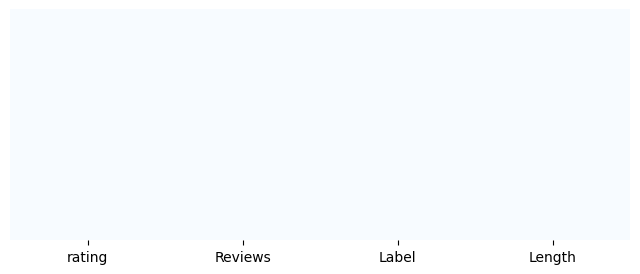

In [35]:
# Plotting heatmap of missing values (if any exists) using seaborn library
# The plot area will be empty if there is no missing values

plt.figure(figsize = (8,3))
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Text(0.5, 1.0, 'Distribution of the Labels')

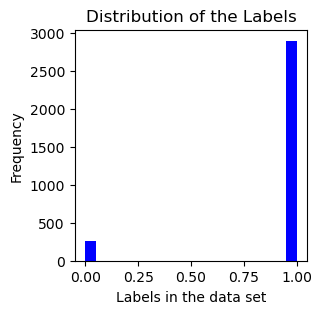

In [39]:
# Plotting a histogram to know the distribution of the 'Label' column

reviews_df['Label'].plot(kind = 'hist', bins = 20, color = 'blue', figsize = (3,3), grid = False)
plt.xlabel('Labels in the data set')
plt.title('Distribution of the Labels')

Text(0.5, 1.0, 'Label Wise Count of Reviews')

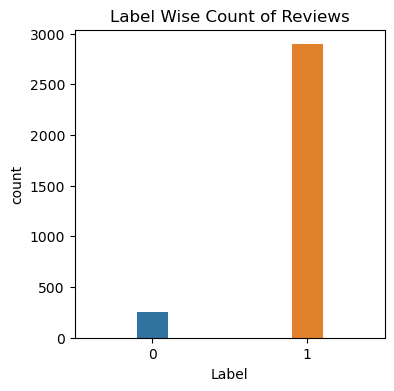

In [40]:
# Use countplot to get the count of each label in the 'Label' column
# Use seaborn to do this

plt.figure(figsize = (4,4))
sns.countplot(x='Label', data = reviews_df , label='Count', width = 0.2)
plt.title('Label Wise Count of Reviews')

Text(0.5, 1.0, 'Rating Wise Count of Reviews')

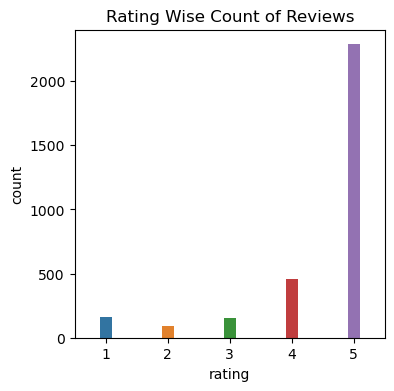

In [41]:
# Use countplot to get the count of each rating from the reviews_df
# Use seaborn to do this

plt.figure(figsize = (4,4))
sns.countplot(x='rating', data = reviews_df , label='Count', width = 0.2)
plt.title('Rating Wise Count of Reviews')

Text(0.5, 0, 'Length of Reviews')

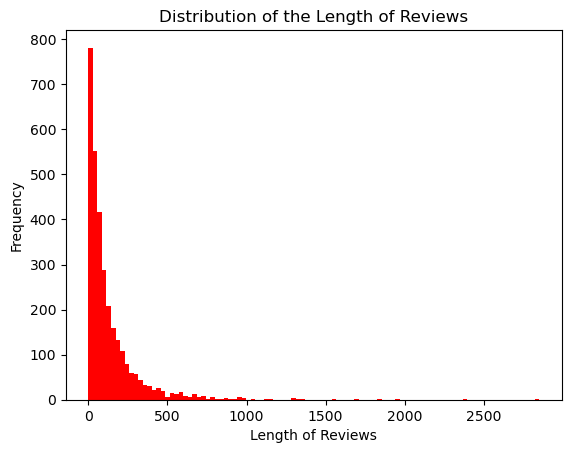

In [43]:
# Plot the histogram to know the distribution of 'Length' column

reviews_df['Length'].plot(kind = 'hist', bins = 100, color = 'red')
plt.title('Distribution of the Length of Reviews')
plt.xlabel('Length of Reviews')

Text(0.5, 1.0, 'WordCloud for Complete Data')

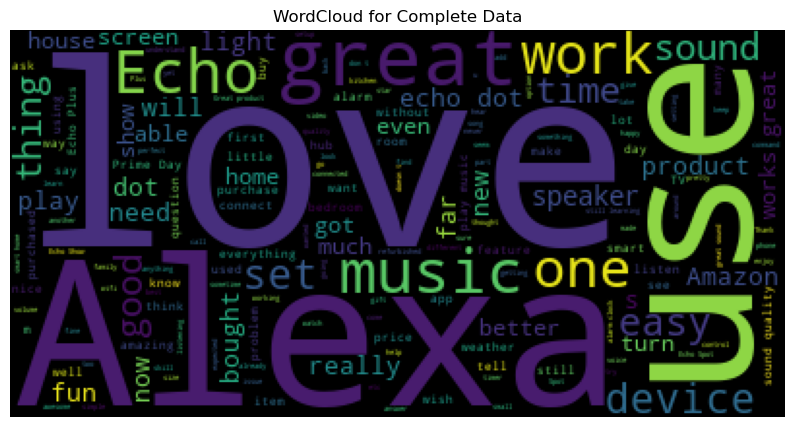

In [45]:
# Plot WordCloud for the original data frame reviews_df

plt.figure(figsize = (10,10))
plt.imshow(wc().generate(orgjoinedstring))
plt.axis('off')
plt.title('WordCloud for Complete Data')

Text(0.5, 1.0, 'WordCloud for the Positive Reviews Data')

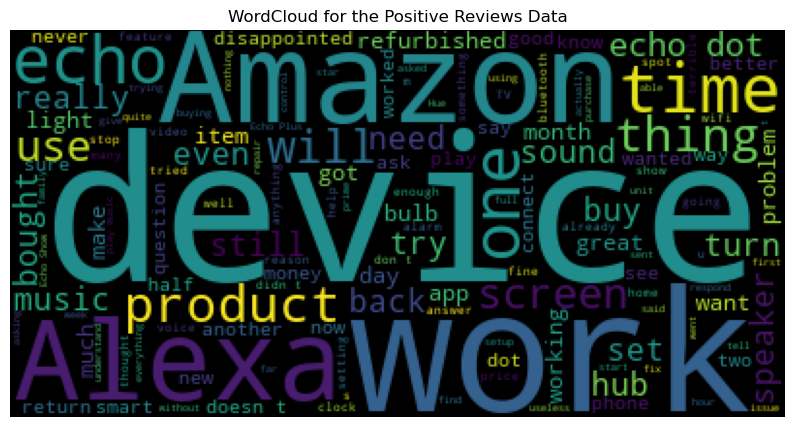

In [46]:
# Plot WordCloud for the positive reviews data frame posreviews_df

plt.figure(figsize = (10,10))
plt.imshow(wc().generate(posjoinedstring))
plt.axis('off')
plt.title('WordCloud for the Positive Reviews Data')

Text(0.5, 1.0, 'WordCloud for the Negative Reviews Data')

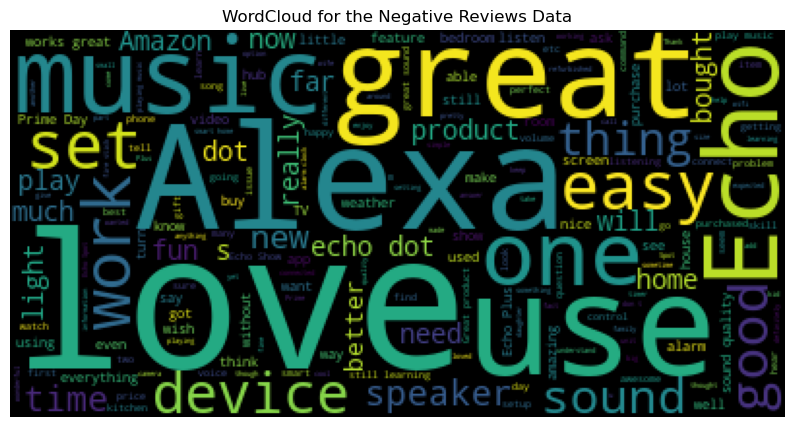

In [47]:
# Plot WordCloud for the negative reviews data frame negreviews_df

plt.figure(figsize = (10,10))
plt.imshow(wc().generate(negjoinedstring))
plt.axis('off')
plt.title('WordCloud for the Negative Reviews Data')

## Building Machine Learning Pipelines  Using different  ML Models

* Splitting the data set into training and test part
* Check the shape of train and test data
* Build Naive Bayes Multinomial Model - define, train, predict result, check accuracy
* Build Logistic Regression Model - define, train, predict result, check accuracy
* Build Ensemble Model - GradientBoostingClassifier - define, train, predict result, check accuracy
* In last, tabulate the results, get from the above three models

In [48]:
# Splitting the data set X(input) and y(output) into train and test part
# Use test_size parameter as 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
# Check the shape of train and test data

print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (2519, 5211)
Shape of X_test is: (630, 5211)
Shape of y_train is: (2519,)
Shape of y_test is: (630,)


### Build Naive Bayes Multinomial Model

* Define the model instance
* Train the model with X_train and y_train
* Predict outcomes using the X_test
* Check accuracy of the model using y_test, prediction, classification_report and confusion_matrix

In [51]:
# Define Naive Bayes Model Instance
model_NB = MultinomialNB()

# Training the model using X_train and y_train
model_NB.fit(X_train, y_train)

# Predicting the results for the input X_test
prediction_NB = model_NB.predict(X_test)

In [53]:
# Getting the classification report for the Naive Bayes model

classificationreport_NB = classification_report(y_test, prediction_NB)
print(classificationreport_NB)

              precision    recall  f1-score   support

           0       0.52      0.44      0.47        39
           1       0.96      0.97      0.97       591

    accuracy                           0.94       630
   macro avg       0.74      0.70      0.72       630
weighted avg       0.94      0.94      0.94       630



<Axes: >

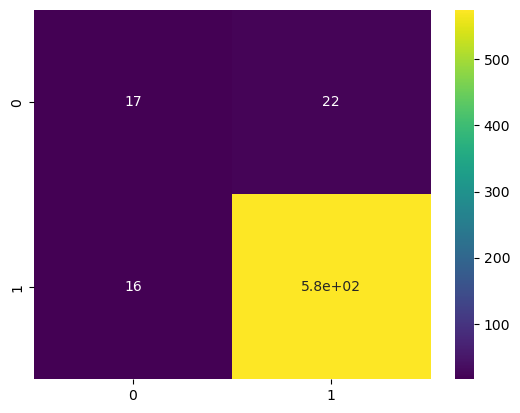

In [57]:
# Getting the Confusion matrix for the Naive Bayes Model

cnfm = confusion_matrix(y_test, prediction_NB)
sns.heatmap(cnfm, annot = True, cmap = 'viridis')

### Build Logistic Regression Model

* Define the model instance
* Train the model with X_train and y_train
* Predict outcomes using the X_test
* Check accuracy of the model using y_test, prediction, classification_report and confusion_matrix

In [58]:
# Define the Logistic Regression model
model_LR = LogisticRegression()

# Training the model with X_train and y_train
model_LR.fit(X_train, y_train)

# Predicting the result for the input X_test
prediction_LR = model_LR.predict(X_test)

In [59]:
# Get the classification report for the Logistic Regression Model

classificationreport_LR = classification_report(y_test, prediction_LR)
print(classificationreport_LR)

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        39
           1       0.96      0.99      0.97       591

    accuracy                           0.95       630
   macro avg       0.83      0.70      0.75       630
weighted avg       0.95      0.95      0.95       630



<Axes: >

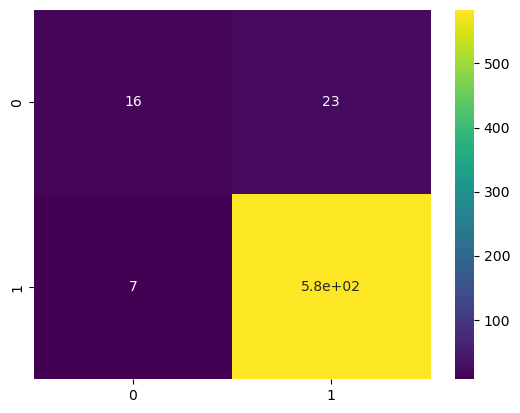

In [60]:
# Getting the Confusion matrix for the Logistic Regression Model

cnfm = confusion_matrix(y_test, prediction_LR)
sns.heatmap(cnfm, annot = True, cmap = 'viridis')

### Use Ensemble method along with GradientBoostingClassifier model

* Define the model instance
* Train the model with X_train and y_train
* Predict outcomes using the X_test
* Check accuracy of the model using y_test, prediction, classification_report and confusion_matrix

In [61]:
# Define the model using ensemble technique and GradientBoostingClassifier model
model_GBC = GradientBoostingClassifier()

# Train the Model using X_train and y_train
model_GBC.fit(X_train, y_train)

# Predicting results for the input x_test
prediction_GBC = model_GBC.predict(X_test)

In [62]:
# Get the classification report for the Ensemble-GBC Model

classificationreport_GBC = classification_report(y_test, prediction_GBC)
print(classificationreport_GBC)

              precision    recall  f1-score   support

           0       0.78      0.18      0.29        39
           1       0.95      1.00      0.97       591

    accuracy                           0.95       630
   macro avg       0.86      0.59      0.63       630
weighted avg       0.94      0.95      0.93       630



<Axes: >

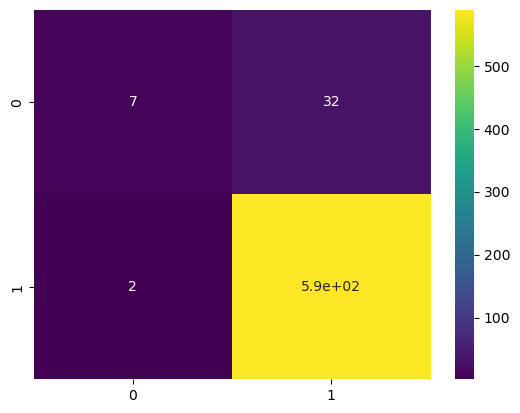

In [63]:
# Getting the Confusion matrix for the Ensemble-GBC Model

cnfm = confusion_matrix(y_test, prediction_GBC)
sns.heatmap(cnfm, annot = True, cmap = 'viridis')

In [70]:
# Tabulating the results to compare different models
# For this We Look at the weighet Average Values

# Creating a dictinary of results
report = {'Model_Name':['Naive_Bayes','Logistic_Regression','Ensemble_GBC'],
          'Precision':[0.94,0.95,0.94], 'Recall':[0.94,0.95,0.95], 
          'F1_Score':[0.94,0.95,0.93], 'Support':[630,630,630]}

# Converting the dictionary to a data frame object
report = pd.DataFrame(report)

# Seting index of the report to the 'Model_Name' column
report.set_index('Model_Name', inplace = True)

# Printing the Report
report

,Precision,Recall,F1_Score,Support
Model_Name,,,,
Naive_Bayes,0.94,0.94,0.94,630
Logistic_Regression,0.95,0.95,0.95,630
Ensemble_GBC,0.94,0.95,0.93,630


#### The Best Model for this Project is the Logistic Regression Model, as it has the highest F1_Score for Weighted Averages